In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'D:\rakamin_machinelearningprep\Hands-on\Food_Delivery_Dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           45593 non-null  object 
 1   delivery_person_id           45593 non-null  object 
 2   delivery_person_age          43739 non-null  float64
 3   delivery_person_ratings      43685 non-null  float64
 4   restaurant_latitude          45593 non-null  float64
 5   restaurant_longitude         45593 non-null  float64
 6   delivery_location_latitude   45593 non-null  float64
 7   delivery_location_longitude  45593 non-null  float64
 8   order_date                   45593 non-null  object 
 9   time_orderd                  43862 non-null  object 
 10  time_order_picked            45593 non-null  object 
 11  weather_conditions           44977 non-null  object 
 12  road_traffic_density         44992 non-null  object 
 13  vehicle_conditio

In [5]:
df.sample(5)

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min
20635,0x4eef,SURRES12DEL03,39.0,4.8,21.183434,72.814492,21.243434,72.874492,03-03-2022,19:30,19:45,Cloudy,Jam,2,Meal,motorcycle,2.0,No,Metropolitian,35.0
6067,0x7b4e,PUNERES04DEL02,34.0,4.9,18.514210,73.838429,18.564210,73.888429,30-03-2022,20:30,20:35,Sandstorms,Jam,2,Snack,electric_scooter,1.0,No,Metropolitian,29.0
24521,0x6e17,INDORES13DEL01,25.0,5.0,22.745049,75.892471,22.755049,75.902471,21-03-2022,8:35,8:50,Sandstorms,Low,1,Snack,scooter,1.0,No,Urban,18.0
1290,0x22a2,PUNERES19DEL03,36.0,4.3,18.563934,73.915367,18.623935,73.975367,07-03-2022,20:30,20:35,Cloudy,Jam,1,Buffet,scooter,0.0,No,Metropolitian,35.0
18086,0x1497,PUNERES18DEL01,34.0,4.8,18.593481,73.785901,18.633481,73.825901,13-03-2022,12:35,12:50,Sandstorms,High,2,Buffet,electric_scooter,1.0,No,Metropolitian,28.0


In [6]:
df.isna().sum()

id                                0
delivery_person_id                0
delivery_person_age            1854
delivery_person_ratings        1908
restaurant_latitude               0
restaurant_longitude              0
delivery_location_latitude        0
delivery_location_longitude       0
order_date                        0
time_orderd                    1731
time_order_picked                 0
weather_conditions              616
road_traffic_density            601
vehicle_condition                 0
type_of_order                     0
type_of_vehicle                   0
multiple_deliveries             993
festival                        228
city                           1200
time_taken_min                    0
dtype: int64

In [7]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['id', 'delivery_person_id', 'weather_conditions', 'road_traffic_density', 'type_of_order', 'type_of_vehicle', 'festival', 'city']
nums = ['delivery_person_age', 'delivery_person_ratings', 'vehicle_condition', 'multiple_deliveries', 'time_taken_min']
timestamp = ['order_date', 'time_orderd', 'time_order_picked']
geoloc = ['restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude']

In [8]:
# ringkasan statistik dari kolom numerik
df[nums].describe()

,delivery_person_age,delivery_person_ratings,vehicle_condition,multiple_deliveries,time_taken_min
count,43739.000000,43685.000000,45593.000000,44600.000000,45593.000000
mean,29.567137,4.633780,1.023359,0.744664,26.294607
std,5.815155,0.334716,0.839065,0.572473,9.383806
min,15.000000,1.000000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,1.000000,1.000000,26.000000
75%,35.000000,4.900000,2.000000,1.000000,32.000000
max,50.000000,6.000000,3.000000,3.000000,54.000000


In [9]:
# categorical columns
df[cats].describe()

,id,delivery_person_id,weather_conditions,road_traffic_density,type_of_order,type_of_vehicle,festival,city
count,45593,45593,44977,44992,45593,45593,45365,44393
unique,45593,1320,6,4,4,4,2,3
top,0x9b47,JAPRES11DEL02,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1,67,7654,15477,11533,26435,44469,34093


In [10]:
# karena sedikit, dapat kita drop
df.dropna(inplace=True, subset=['festival'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45365 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           45365 non-null  object 
 1   delivery_person_id           45365 non-null  object 
 2   delivery_person_age          43521 non-null  float64
 3   delivery_person_ratings      43468 non-null  float64
 4   restaurant_latitude          45365 non-null  float64
 5   restaurant_longitude         45365 non-null  float64
 6   delivery_location_latitude   45365 non-null  float64
 7   delivery_location_longitude  45365 non-null  float64
 8   order_date                   45365 non-null  object 
 9   time_orderd                  43643 non-null  object 
 10  time_order_picked            45365 non-null  object 
 11  weather_conditions           44752 non-null  object 
 12  road_traffic_density         44767 non-null  object 
 13  vehicle_condition    

In [12]:
# imputasi kolom kategorikal dengan nilai yang paling sering muncul
df['delivery_person_ratings'].fillna(df['delivery_person_ratings'].mode()[0], inplace=True)
df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True)
df['weather_conditions'].fillna(df['weather_conditions'].mode()[0], inplace=True)
df['city'].fillna(df['city'].mode()[0], inplace=True)
df['time_orderd'].fillna(df['time_orderd'].mode()[0], inplace=True)
df['road_traffic_density'].fillna(df['road_traffic_density'].mode()[0], inplace=True)

C:\Users\Wahgus\AppData\Local\Temp\ipykernel_16960\3119127117.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['delivery_person_ratings'].fillna(df['delivery_person_ratings'].mode()[0], inplace=True)
C:\Users\Wahgus\AppData\Local\Temp\ipykernel_16960\3119127117.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

In [13]:
# imputasi kolom numerikal dengan nilai rata-rata
df['delivery_person_age'].fillna(df['delivery_person_age'].mean(), inplace=True)

C:\Users\Wahgus\AppData\Local\Temp\ipykernel_16960\2911027766.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['delivery_person_age'].fillna(df['delivery_person_age'].mean(), inplace=True)


In [14]:
# cek jumlah duplicated rows
# dari semua kolom
df.duplicated().sum()

np.int64(0)

In [15]:
df.duplicated(subset=['delivery_person_id']).sum()

np.int64(44045)

In [16]:
from scipy import stats

In [17]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['delivery_person_age',	'delivery_person_ratings']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 45365
Jumlah baris setelah memfilter outlier: 44595


In [18]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['delivery_person_age',	'delivery_person_ratings']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 44595
Jumlah baris setelah memfilter outlier: 40020


<Axes: xlabel='delivery_person_age', ylabel='Density'>

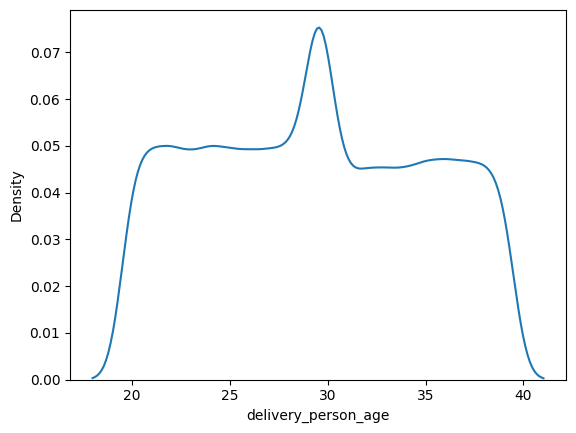

In [19]:
# distribusi gaji (nilai asli)
sns.kdeplot(df['delivery_person_age'])

<Axes: xlabel='delivery_person_age', ylabel='Density'>

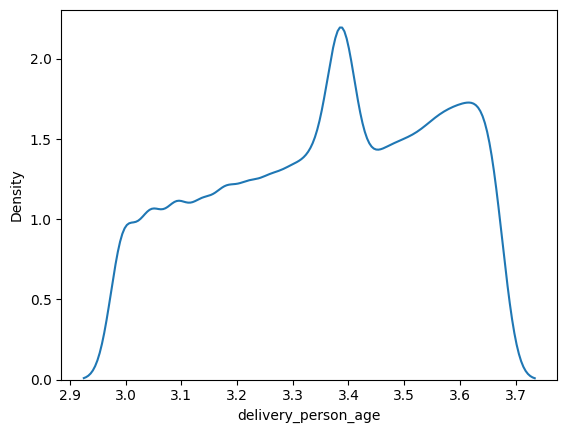

In [20]:
# distribusi gaji (setelah log transformation)
sns.kdeplot(np.log(df['delivery_person_age']))
# lebih mendekati distribusi normal!

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [23]:
# berat dan tinggi kita re-scale
df['delivery_person_age_norm'] = MinMaxScaler().fit_transform(df['delivery_person_age'].values.reshape(len(df), 1))

# umur dan log gaji kita standarisasi (karena distribusi datanya sudah mendekati normal)
df['delivery_person_age_std'] = StandardScaler().fit_transform(df['delivery_person_age'].values.reshape(len(df), 1))

In [24]:
df[['delivery_person_age','delivery_person_age_std','delivery_person_age_norm']].describe()

,delivery_person_age,delivery_person_age_std,delivery_person_age_norm
count,40020.000000,4.002000e+04,40020.000000
mean,29.322047,-4.616220e-17,0.490634
std,5.626224,1.000012e+00,0.296117
min,20.000000,-1.656913e+00,0.000000
25%,25.000000,-7.682064e-01,0.263158
50%,29.588566,4.737154e-02,0.504661
75%,34.000000,8.314656e-01,0.736842
max,39.000000,1.720172e+00,1.000000


In [25]:
# label encoder pada road_traffic_density, city dan weather_conditions
df['weather_conditions'] = df['weather_conditions'].astype('category').cat.codes
df['road_traffic_density'] = df['road_traffic_density'].astype('category').cat.codes
df['city'] = df['city'].astype('category').cat.codes
df['festival'] = df['festival'].astype('category').cat.codes

In [26]:
# type_of_order	type_of_vehicle
for cat in ['type_of_order','type_of_vehicle']:
  onehots = pd.get_dummies(df[cat], prefix=cat)
  df = df.join(onehots)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40020 entries, 0 to 45592
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                40020 non-null  object 
 1   delivery_person_id                40020 non-null  object 
 2   delivery_person_age               40020 non-null  float64
 3   delivery_person_ratings           40020 non-null  float64
 4   restaurant_latitude               40020 non-null  float64
 5   restaurant_longitude              40020 non-null  float64
 6   delivery_location_latitude        40020 non-null  float64
 7   delivery_location_longitude       40020 non-null  float64
 8   order_date                        40020 non-null  object 
 9   time_orderd                       40020 non-null  object 
 10  time_order_picked                 40020 non-null  object 
 11  weather_conditions                40020 non-null  int8   
 12  road_traf

In [28]:
# drop kolom kategori yang asli (karena sudah di-encoding)
df_new = df.drop(columns=['type_of_order','type_of_vehicle']).copy()

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40020 entries, 0 to 45592
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                40020 non-null  object 
 1   delivery_person_id                40020 non-null  object 
 2   delivery_person_age               40020 non-null  float64
 3   delivery_person_ratings           40020 non-null  float64
 4   restaurant_latitude               40020 non-null  float64
 5   restaurant_longitude              40020 non-null  float64
 6   delivery_location_latitude        40020 non-null  float64
 7   delivery_location_longitude       40020 non-null  float64
 8   order_date                        40020 non-null  object 
 9   time_orderd                       40020 non-null  object 
 10  time_order_picked                 40020 non-null  object 
 11  weather_conditions                40020 non-null  int8   
 12  road_traf

In [ ]:
#beda versi beda cerita
plt.figure(figsize=(15, 15))
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')

<Axes: >

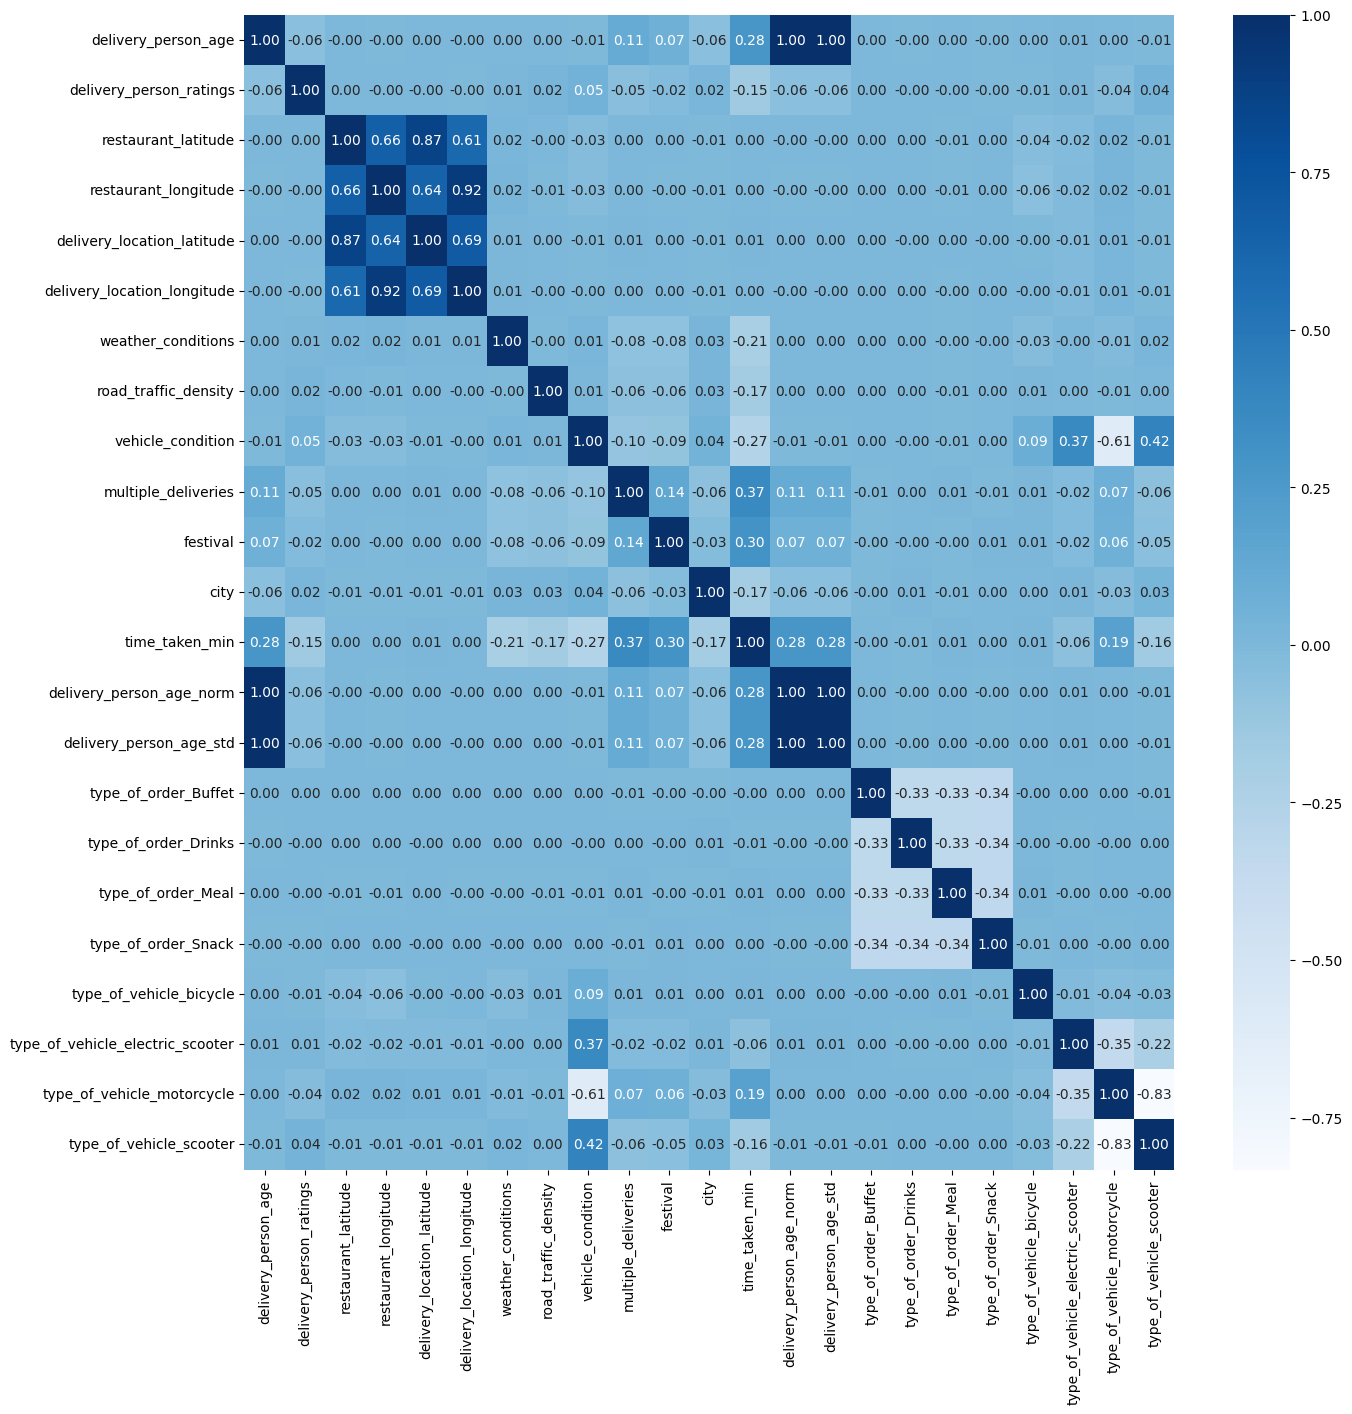

In [33]:
# Simpan hanya kolom numerik
df_numeric = df_new.select_dtypes(include=['number', 'bool'])  # bool bisa dikonversi ke 0/1
plt.figure(figsize=(15, 15))
sns.heatmap(df_numeric.corr(), cmap='Blues', annot=True, fmt='.2f')


In [34]:
drop_columns = ['id', 'delivery_person_id', 'time_taken_min','type_of_vehicle_scooter','delivery_person_age', 'delivery_person_age_norm'] + geoloc + timestamp

In [35]:
# pemisahan features vs target
X = df_new.drop(drop_columns, axis=1)
y = df_new['time_taken_min'].values

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40020 entries, 0 to 45592
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   delivery_person_ratings           40020 non-null  float64
 1   weather_conditions                40020 non-null  int8   
 2   road_traffic_density              40020 non-null  int8   
 3   vehicle_condition                 40020 non-null  int64  
 4   multiple_deliveries               40020 non-null  float64
 5   festival                          40020 non-null  int8   
 6   city                              40020 non-null  int8   
 7   delivery_person_age_std           40020 non-null  float64
 8   type_of_order_Buffet              40020 non-null  bool   
 9   type_of_order_Drinks              40020 non-null  bool   
 10  type_of_order_Meal                40020 non-null  bool   
 11  type_of_order_Snack               40020 non-null  bool   
 12  type_of_v

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)